In [2]:
import os
import numpy as np
import xarray as xr
import regionmask

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

BASEPATH = '/jetfs/home/lbrunner/ml_logreg_data'

ERROR 1: PROJ: proj_create_from_database: Open of /jetfs/home/lbrunner/.conda/envs/model_learning/share/proj failed


## Combine land mask and IOSST data availability

NOTE: originally we used only the regionmask land mask but this is not quite 
consistent with IOSST data availability. Just using IOSST leads to many coast
grid cells with hardly any ocean being classified as ocean as well. Therefore
we use a combination of both

In [15]:
fn = os.path.join(BASEPATH, 'tas_day_IOSST_historical_r1_g025.nc')
ds = xr.open_dataset(fn, use_cftime=True)['sst']
ds = ds.squeeze('zlev', drop=True)
mask_r = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(ds, wrap_lon=None) == 0
mask_io = np.any(np.isnan(ds), axis=0)
mask = mask_r | mask_io
mask.to_dataset(name='land_mask').to_netcdf(os.path.join('data', 'land_mask.nc'))

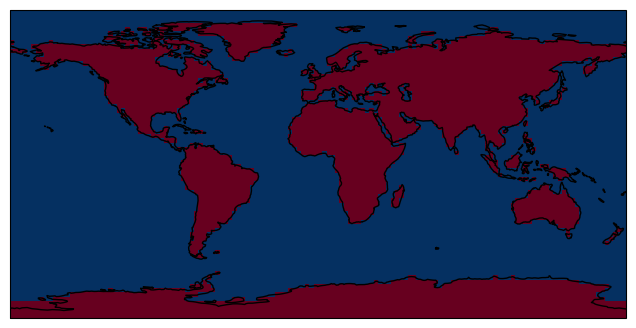

In [16]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(8, 4))

map_ = ax.pcolormesh(
    mask['lon'], mask['lat'], mask,
    cmap='RdBu_r')
ax.coastlines()

## Differences between the masks

- red is land in both
- blue is ocean in both
- white is land in one and ocean in the other

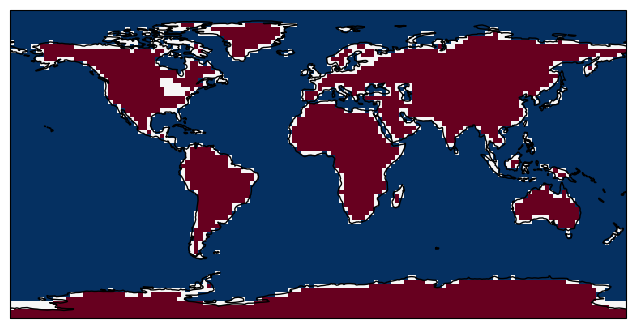

In [24]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(8, 4))

map_ = ax.pcolormesh(
    mask['lon'], mask['lat'], mask_r.astype(int) + mask_io.astype(int),
    cmap='RdBu_r')
ax.coastlines()